In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

<h1><center>Introduction to convolutional process</center></h1>

### Autor
- Nombre: Edwin Jahir Rueda Rojas
- email: ejrueda95g@gmail.com

### Convolución entre funciónes
- La convolución es una operación matemática que recibe como entrada dos funciones denotadas por $f$ y $g$, y genera como salida una tercera función la cual representa el producto entre $f$ y el desplazamiento desde $-\infty$ hasta $\infty$ de la función $g$ invertida.

$$(f*g)(t) = \int_{-\infty}^\infty f(t)g(t-\tau)d\tau$$

donde $f$ es considerada la señal de origen y $g$ es considerado el filtro

Referencia [Wikipedia:convolución](https://es.wikipedia.org/wiki/Convoluci%C3%B3n)

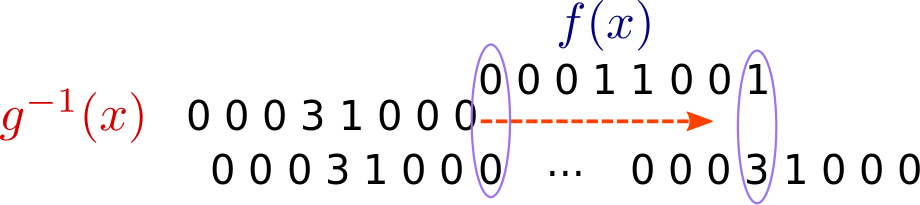

In [2]:
PIL.Image.open("../images/convolution_example.png")

In [3]:
f = np.array([0,0,0,1,1,0,0,1])
g = np.array([0,0,0,1,3,0,0,0])
print("f:", f, "tamaño:", len(f))
print("g:", g, "tamaño:", len(g))
c = np.convolve(f,g, mode="full")
print("c:", c, "tamaño:", len(c))

f: [0 0 0 1 1 0 0 1] tamaño: 8
g: [0 0 0 1 3 0 0 0] tamaño: 8
c: [0 0 0 0 0 0 1 4 3 0 1 3 0 0 0] tamaño: 15


##### Observaciones
- note que el resultado de una convolución completa (<i>full convolution</i>) entre dos vectores de tamaño $m$ y $n$, da como resultado un vector de tamaño $m+n-1$

- Demostración de una convolución entre funciones (una dimensión)

In [4]:
def full_conv_1D(f,g, verbose=True):
    g_inver = g[::-1]
    result = np.zeros(len(f)+len(g)-1)
    for i in range(len(f)+len(g)-1):
        if i < len(f):
            #se indexa así hasta acabar el tamaño de f
            pf, pg = f[:i+1], g_inver[-(i+1):]
        else:
            pf = f[i-len(f)+1:]
            pg = g_inver[:len(pf)]
        result[i] = (pf*pg).sum()
        if verbose:
            print(int(result[i]),"=",pf,"*",pg)
    return result

In [8]:
print("f: ", f)
print("g: ", g)
print("---------------")
print("convolution")
print("---------------")
print(full_conv_1D(f, g))

f:  [0 0 0 1 1 0 0 1]
g:  [0 0 0 1 3 0 0 0]
---------------
convolution
---------------
0 = [0] * [0]
0 = [0 0] * [0 0]
0 = [0 0 0] * [0 0 0]
0 = [0 0 0 1] * [1 0 0 0]
0 = [0 0 0 1 1] * [3 1 0 0 0]
0 = [0 0 0 1 1 0] * [0 3 1 0 0 0]
1 = [0 0 0 1 1 0 0] * [0 0 3 1 0 0 0]
4 = [0 0 0 1 1 0 0 1] * [0 0 0 3 1 0 0 0]
3 = [0 0 1 1 0 0 1] * [0 0 0 3 1 0 0]
0 = [0 1 1 0 0 1] * [0 0 0 3 1 0]
1 = [1 1 0 0 1] * [0 0 0 3 1]
3 = [1 0 0 1] * [0 0 0 3]
0 = [0 0 1] * [0 0 0]
0 = [0 1] * [0 0]
0 = [1] * [0]
[0. 0. 0. 0. 0. 0. 1. 4. 3. 0. 1. 3. 0. 0. 0.]


- También existe otro tipo de convolución que es llamada <b>same</b>, este tipo de convolución genera como salida un vector con dimensión $max(m,n)$

In [6]:
cs = np.convolve(f,g, mode="same")
print("tamaño:", len(cs))
print(cs)

tamaño: 8
[0 0 0 1 4 3 0 1]


#### Convolución en imágenes
- La convolución en imágenes es exactamente igual a la convolución en vectores 1D.

Convolución básica


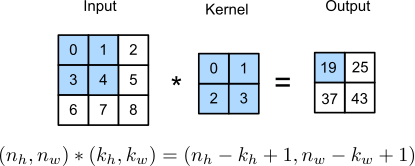

In [9]:
print("Convolución básica")
PIL.Image.open("../images/conv_2d_no_stride.png")

- En convoluciones de imágenes se tienen dos parámetros importantes los cuales ayudan a mejorar el rendimiento de las CNN propuestas:
    - <b>padding:</b> Este parámetro lo que hace es colocar ceros al rededor de la imagen (si padding=1) lo que permite que la imagen no se vuelva pequeña al convolucionarla con el kernel, lo que provocaría pérdida de información de los bordes de la imagen.
    
    - <b>stride:</b>  "el salto del kernel", por defecto es igual a 1. Controla el desplazamiento del kernel.
    

Convolución con padding


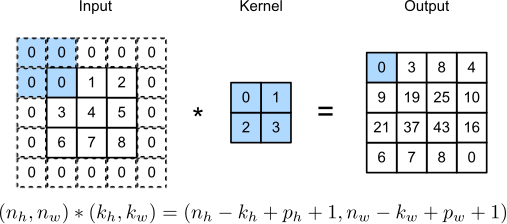

In [10]:
print("Convolución con padding")
PIL.Image.open("../images/conv_2d_padding.png")

Convolución con padding y stride


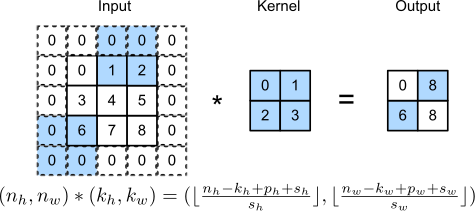

In [11]:
print("Convolución con padding y stride")
PIL.Image.open("../images/conv_2d_stride_padding.png")

### Convolución 2D con TensorFlow

- Tensorflow espera que las dimensiones de entrada a sus capas sea así:
        num_imagenes, ancho_pixeles, alto_pixeles, canales (RGB)

Transform to gray scale:


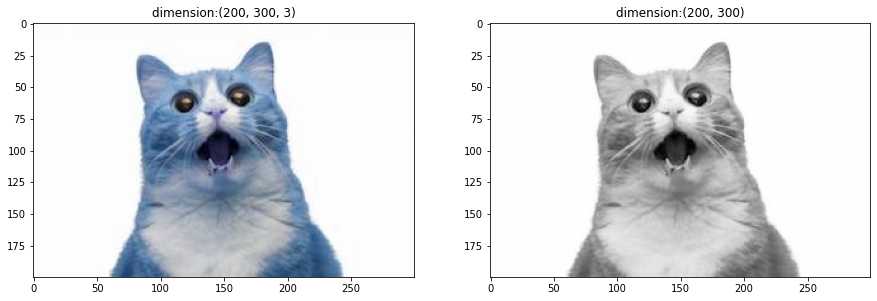

In [14]:
import tensorflow as tf
tf.keras.backend.set_floatx('float64')
import cv2 #open cv, para trabajar con las imágenes

print("Transform to gray scale:")
img = cv2.imread("../data/archive/raw-img/gatto/1021.jpeg")
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("dimension:"+str(img.shape))
plt.imshow(img);
img_pro = np.mean(img, axis=2) #promediamos la columna de los colores
plt.subplot(1,2,2)
plt.title("dimension:" + str(img_pro.shape))
plt.imshow(img_pro, cmap=plt.cm.Greys_r);

In [15]:
#se cambia la dimensión de la imagen para que cumpla con la dimensión pedida en tensorflow
img_pro_tf = img_pro.reshape(1,img.shape[0],img.shape[1],1)
c_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=3, padding="same")
c_layer.build(input_shape=img_pro_tf.shape)

- <b>Nota:</b> Por defecto tensorflow inicializa los pesos del kernel en las capas

In [16]:
pesos = c_layer.get_weights()[0]
print("dimension de los pesos:", pesos.shape)
pesos

dimension de los pesos: (3, 3, 1, 1)


array([[[[-0.34304982]],

        [[-0.12583275]],

        [[ 0.0940943 ]]],


       [[[-0.41531534]],

        [[ 0.46620333]],

        [[ 0.32658991]]],


       [[[-0.33445594]],

        [[ 0.26766727]],

        [[-0.05977167]]]])

- Para ver la funcionalidad de los kernel y su alcance, utilizaremos unos kernel definidos los cuales sirven para realzar ciertas cosas en las imágenes.

#### Kernel para realzar bordes
        [[-1 -1 -1]
         [-1  8 -1]
         [-1 -1 -1]]

In [17]:
#definimos el kernel
k_bordes = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
print("dimension del kernel:", k_bordes.shape)
#lo redimensionamos para que tensorflow lo entienda
k_bordes_tf = np.reshape(k_bordes, newshape=(k_bordes.shape[0], k_bordes.shape[1],1,1))
print("nueva dimension del kernel:", k_bordes_tf.shape)

dimension del kernel: (3, 3)
nueva dimension del kernel: (3, 3, 1, 1)


- configuramos los pesos de la capa convolucional de forma manual

kernel de bordes


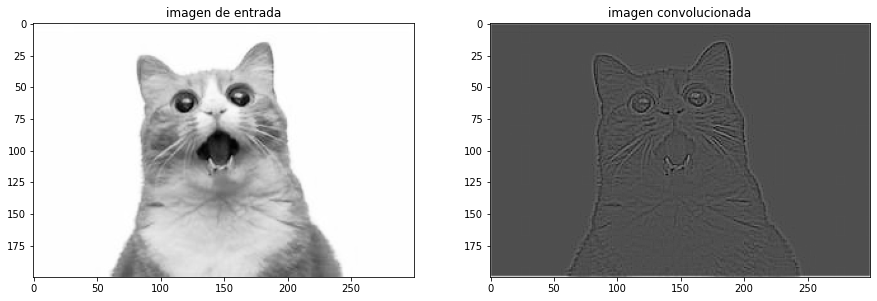

In [18]:
print("kernel de bordes")
c_layer.set_weights([k_bordes_tf, np.array([0])])
#le pasamos la imagen como entrada a la capa
img_result = c_layer(img_pro_tf)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("imagen de entrada")
plt.imshow(img_pro, cmap=plt.cm.Greys_r);
plt.subplot(1,2,2)
plt.title("imagen convolucionada")
plt.imshow(img_result.numpy()[0,:,:,0], cmap=plt.cm.Greys_r);
plt.savefig("../images/gatos.svg")

kernel de desenfoque


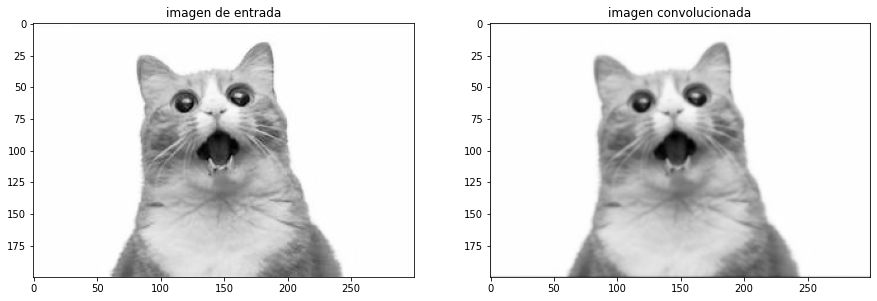

In [19]:
print("kernel de desenfoque")
#definimos el kernel
k_bordes = np.array([[1,2,1],[2,4,2],[1,2,1]])*(1/16)
#print("dimension del kernel:", k_bordes.shape)
#lo redimensionamos para que tensorflow lo entienda
k_bordes_tf = np.reshape(k_bordes, newshape=(k_bordes.shape[0], k_bordes.shape[1],1,1))
#print("nueva dimension del kernel:", k_bordes_tf.shape)
c_layer.set_weights([k_bordes_tf, np.array([0])])
#le pasamos la imagen como entrada a la capa
img_result = c_layer(img_pro_tf)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("imagen de entrada")
plt.imshow(img_pro, cmap=plt.cm.Greys_r);
plt.subplot(1,2,2)
plt.title("imagen convolucionada")
plt.imshow(img_result.numpy()[0,:,:,0], cmap=plt.cm.Greys_r);

kernel de enfoque


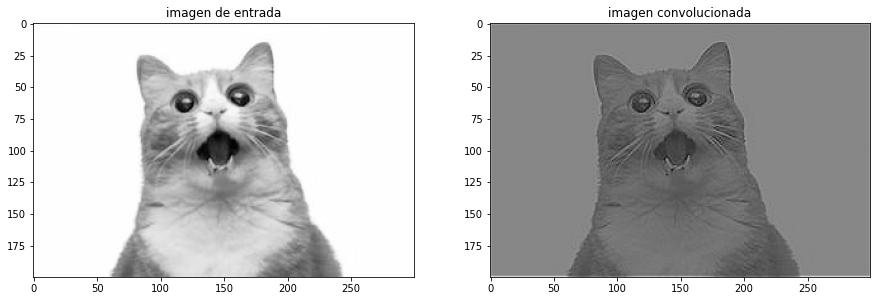

In [20]:
print("kernel de enfoque")
#definimos el kernel
k_bordes = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
#print("dimension del kernel:", k_bordes.shape)
#lo redimensionamos para que tensorflow lo entienda
k_bordes_tf = np.reshape(k_bordes, newshape=(k_bordes.shape[0], k_bordes.shape[1],1,1))
#print("nueva dimension del kernel:", k_bordes_tf.shape)
c_layer.set_weights([k_bordes_tf, np.array([0])])
#le pasamos la imagen como entrada a la capa
img_result = c_layer(img_pro_tf)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("imagen de entrada")
plt.imshow(img_pro, cmap=plt.cm.Greys_r);
plt.subplot(1,2,2)
plt.title("imagen convolucionada")
plt.imshow(img_result.numpy()[0,:,:,0], cmap=plt.cm.Greys_r);

kernel de detección de bordes con efecto


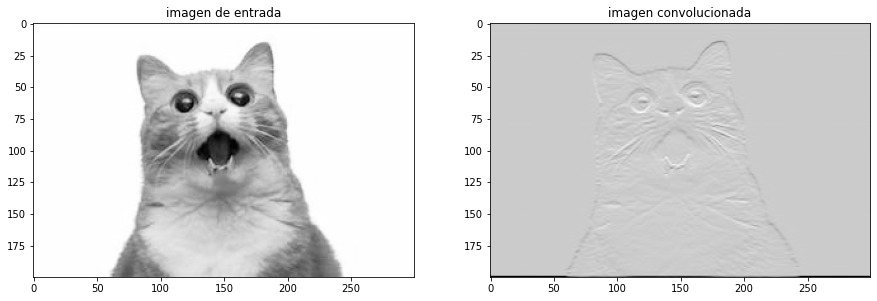

In [21]:
print("kernel de detección de bordes con efecto")
#definimos el kernel
k_bordes = np.array([[-1,-1],[1,1]])
#como se cambia la dimensión del kernel hay que construir nuevamente la capa
c_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding="same")
c_layer.build(input_shape=img_pro_tf.shape)
#print("dimension del kernel:", k_bordes.shape)
#lo redimensionamos para que tensorflow lo entienda
k_bordes_tf = np.reshape(k_bordes, newshape=(k_bordes.shape[0], k_bordes.shape[1],1,1))
#print("nueva dimension del kernel:", k_bordes_tf.shape)
c_layer.set_weights([k_bordes_tf, np.array([0])])
#le pasamos la imagen como entrada a la capa
img_result = c_layer(img_pro_tf)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("imagen de entrada")
plt.imshow(img_pro, cmap=plt.cm.Greys_r);
plt.subplot(1,2,2)
plt.title("imagen convolucionada")
plt.imshow(img_result.numpy()[0,:,:,0], cmap=plt.cm.Greys_r);

kernel por defecto en tensorflow
(5, 5, 1, 1)
dimension original: (1, 200, 300, 1)
dimension nueva: (1, 98, 148, 1)


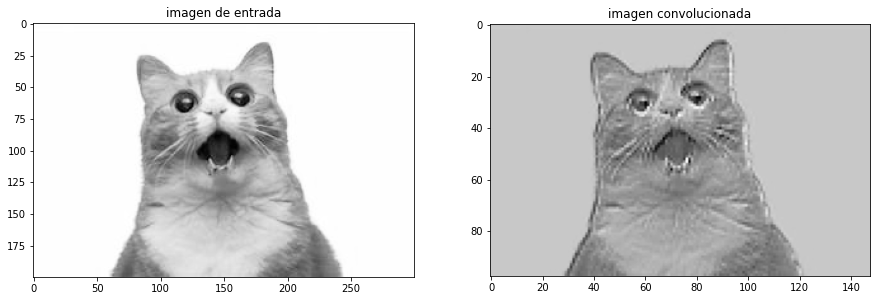

In [33]:
print("kernel por defecto en tensorflow")
#como se cambia la dimensión del kernel hay que construir nuevamente la capa
c_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=5, strides=2)
c_layer.build(input_shape=img_pro_tf.shape)
print(c_layer.get_weights()[0].shape)
#le pasamos la imagen como entrada a la capa
img_result = c_layer(img_pro_tf)
print("dimension original:", img_pro_tf.shape)
print("dimension nueva:", img_result.shape)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("imagen de entrada")
plt.imshow(img_pro, cmap=plt.cm.Greys_r);
plt.subplot(1,2,2)
plt.title("imagen convolucionada")
plt.imshow(img_result.numpy()[0,:,:,0], cmap=plt.cm.Greys_r);
plt.savefig("../images/conv2d_cats.svg")

- Note que si se emplea un kernel grande con solo números 1, este servirá como kernel de desenfoque.

kernel de desenfoque
Dimensión: (7, 7)


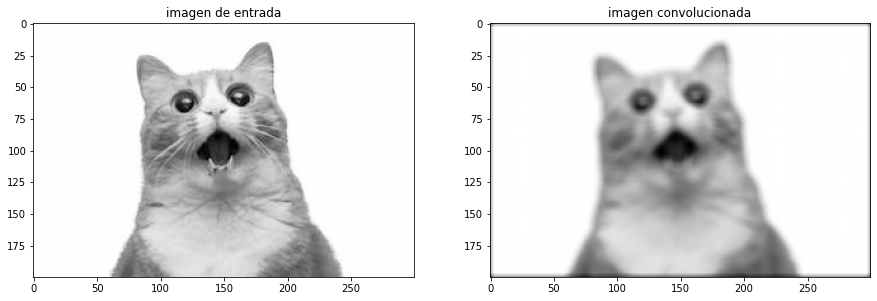

In [35]:
print("kernel de desenfoque")
#definimos el kernel
k_bordes = np.ones((7,7))
print("Dimensión:", k_bordes.shape)
#como se cambia la dimensión del kernel hay que construir nuevamente la capa
c_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=k_bordes.shape[0], padding="same")
c_layer.build(input_shape=img_pro_tf.shape)
#print("dimension del kernel:", k_bordes.shape)
#lo redimensionamos para que tensorflow lo entienda
k_bordes_tf = np.reshape(k_bordes, newshape=(k_bordes.shape[0], k_bordes.shape[1],1,1))
#print("nueva dimension del kernel:", k_bordes_tf.shape)
c_layer.set_weights([k_bordes_tf, np.array([0])])
#le pasamos la imagen como entrada a la capa
img_result = c_layer(img_pro_tf)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("imagen de entrada")
plt.imshow(img_pro, cmap=plt.cm.Greys_r);
plt.subplot(1,2,2)
plt.title("imagen convolucionada")
plt.imshow(img_result.numpy()[0,:,:,0], cmap=plt.cm.Greys_r);

### MaxPooling2D

In [38]:
mp = tf.keras.layers.MaxPooling2D(pool_size=3)

(1, 200, 300, 1)
(1, 66, 100, 1)


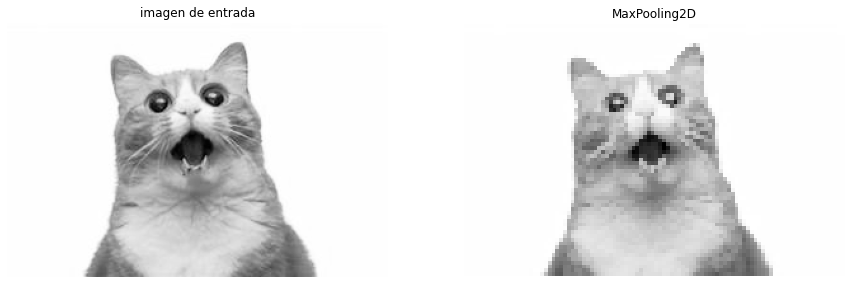

In [39]:
img_mp = mp(img_pro_tf)
print(img_pro_tf.shape)
print(img_mp.shape)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("imagen de entrada")
plt.axis("off")
plt.imshow(img_pro, cmap=plt.cm.Greys_r);
plt.subplot(1,2,2)
plt.title("MaxPooling2D")
plt.imshow(img_mp.numpy()[0,:,:,0], cmap=plt.cm.Greys_r);
plt.axis("off")
plt.savefig("../images/gatos_mp.svg")